### Compute a zeropoint between our SE mag_auto in the ACS total images and the non extinction corrected f814w iso-mags in the HST ACS-IR catalogs

In [1]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt

from os.path import expanduser
from wlenet import config
from wlenet.misc.gpu import avoid_gpu_in_this_process; avoid_gpu_in_this_process()

from wlenet.cluster.cluster_lensing import ClusterLensing
from wlenet.cluster.cluster_survey import ClusterSurvey
from wlenet.dataset.figures import show_stamps
from wlenet.misc.figures import abline

In [2]:
save_zeropoint = False

In [3]:
%%capture
survey = ClusterSurvey()
survey.process_survey(parallel=True)

In [4]:
mag_auto = survey.cut['mag_auto']

mag_f814w_extinction_correction = -0.035
mag_f814w_catalog = survey.cut['mag_iso']
mag_f814w_no_correction = mag_f814w_catalog - mag_f814w_extinction_correction

inds = np.abs(mag_f814w_catalog) < 98

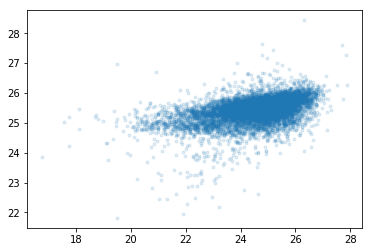

In [5]:
plt.plot(mag_f814w_no_correction[inds], mag_f814w_no_correction[inds] - mag_auto[inds], '.', alpha=0.125)

In [6]:
clash_zeropoint = np.mean(mag_f814w_no_correction[inds] - mag_auto[inds])
print('clash_zeropoint =', clash_zeropoint)

clash_zeropoint = 25.415215393329138


In [7]:
if save_zeropoint:
    clash_zeropoint_path = expanduser(config['calibration_path'] + '/clash_zeropoint.npy')
    np.save(clash_zeropoint_path, clash_zeropoint)

In [8]:
survey.remove_tmp_files()